In [96]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
from dmba import classificationSummary
import math
import matplotlib as plt
import pandas as pd
from sklearn.metrics import pairwise
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


accidents_df = pd.read_csv("D:/dmba/accidentsFull.csv")
accidents_df.head()
accidents_df['INJURY'] = np.where(accidents_df['MAX_SEV_IR']>0, 'yes', 'no')
print(accidents_df.INJURY)

0        yes
1         no
2         no
3         no
4         no
        ... 
42178     no
42179    yes
42180     no
42181     no
42182     no
Name: INJURY, Length: 42183, dtype: object


In [49]:
print(accidents_df['INJURY'].value_counts() / len(accidents_df))

INJURY
yes    0.508783
no     0.491217
Name: count, dtype: float64


In [50]:
accidents_df.head(12)

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR,INJURY
0,0,2,2,1,0,1,0,3,0,0,...,0,3,1,1,1,1,0,0,1,yes
1,1,2,1,0,0,1,1,3,2,0,...,0,3,2,2,0,0,1,0,0,no
2,1,2,1,0,0,1,0,3,2,0,...,1,2,2,2,0,0,1,0,0,no
3,1,2,1,1,0,0,0,3,2,0,...,1,2,2,1,0,0,1,0,0,no
4,1,1,1,0,0,1,0,3,2,0,...,0,2,3,1,0,0,1,0,0,no
5,1,2,1,1,0,1,0,3,0,0,...,0,2,1,2,1,1,0,0,1,yes
6,1,2,1,0,0,1,1,3,0,0,...,0,2,1,2,0,0,1,0,0,no
7,1,2,1,1,0,1,0,3,0,0,...,0,1,1,1,1,1,0,0,1,yes
8,1,2,1,1,0,1,0,3,0,0,...,0,1,1,2,0,0,1,0,0,no
9,0,2,1,0,0,0,0,3,0,0,...,0,1,1,2,0,0,1,0,0,no


In [51]:
accidents1_df = accidents_df.iloc[0:12, :]
accidents1_df = accidents1_df.loc[:, ['WEATHER_R', 'TRAF_CON_R', 'INJURY']]
accidents1_df

,WEATHER_R,TRAF_CON_R,INJURY
0,1,0,yes
1,2,0,no
2,2,1,no
3,1,1,no
4,1,0,no
5,2,0,yes
6,2,0,no
7,1,0,yes
8,2,0,no
9,2,0,no


In [52]:
accidents1_df.WEATHER_R = accidents1_df.WEATHER_R.astype('category')
accidents1_df.TRAF_CON_R = accidents1_df.TRAF_CON_R.astype('category')
accidents1_df.INJURY = accidents1_df.INJURY.astype('category')
accidents1_df.dtypes

WEATHER_R     category
TRAF_CON_R    category
INJURY        category
dtype: object

In [53]:
accidents1_df.pivot_table(index=['INJURY', 'WEATHER_R'], columns=['TRAF_CON_R'], aggfunc=len)


C:\Users\USER\AppData\Local\Temp\ipykernel_6268\2127013100.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  accidents1_df.pivot_table(index=['INJURY', 'WEATHER_R'], columns=['TRAF_CON_R'], aggfunc=len)


TRAF_CON_R          0    1    2
INJURY WEATHER_R               
no     1          1.0  1.0  1.0
       2          5.0  1.0  NaN
yes    1          2.0  NaN  NaN
       2          1.0  NaN  NaN

In [54]:
#Denominator = proportion of combination {WEATHER_R=1, TRAF_CON_R=0}
numerator1 = 2/3 * 3/12
denominator1 = 3/12
p1 = numerator1 / denominator1
print(p1)

numerator2 = 0/3 * 3/12
denominator2 = 1/12
p2 = numerator2 / denominator2

numerator3 = 0/3 * 3/12
denominator3 = 1/12
p3 = numerator3 / denominator3

numerator4 = 1/3 * 3/12
denominator4 = 6/12
p4 = numerator4 / denominator4

numerator5 = 0/3 * 3/12
denominator5 = 1/12
p5 = numerator5 / denominator5

print('P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 0) = ', p1)
print('P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 1) = ', p2)
print('P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 2) = ', p3)
print('P(Injury = yes | WEATHER_R = 2, TRAF_CON_R = 0) = ', p4)
print('P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 1) = ', p5)


0.6666666666666666
P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 0) =  0.6666666666666666
P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 1) =  0.0
P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 2) =  0.0
P(Injury = yes | WEATHER_R = 2, TRAF_CON_R = 0) =  0.16666666666666666
P(Injury = yes | WEATHER_R = 1, TRAF_CON_R = 1) =  0.0


In [55]:
accidents1_df['prob_of_injury'] = [0.667, 0.167, 0, 0, 0.667, 0.167, 0.167, 0.667, 0.167, 0.167, 0.167, 0]
accidents1_df

,WEATHER_R,TRAF_CON_R,INJURY,prob_of_injury
0,1,0,yes,0.667
1,2,0,no,0.167
2,2,1,no,0.000
3,1,1,no,0.000
4,1,0,no,0.667
5,2,0,yes,0.167
6,2,0,no,0.167
7,1,0,yes,0.667
8,2,0,no,0.167
9,2,0,no,0.167


In [56]:
accidents1_df['accident'] = ["Yes" if x > 0.5 else "No" for x in accidents1_df['prob_of_injury']]
accidents1_df

,WEATHER_R,TRAF_CON_R,INJURY,prob_of_injury,accident
0,1,0,yes,0.667,Yes
1,2,0,no,0.167,No
2,2,1,no,0.000,No
3,1,1,no,0.000,No
4,1,0,no,0.667,Yes
5,2,0,yes,0.167,No
6,2,0,no,0.167,No
7,1,0,yes,0.667,Yes
8,2,0,no,0.167,No
9,2,0,no,0.167,No


In [57]:
prob = 2/3 * 0/3 * 3/12
prob

0.0

In [58]:
predictors = ['WEATHER_R', 'TRAF_CON_R']
outcome = 'INJURY'


In [59]:
accidents1_nb = MultinomialNB(alpha=0.01)
accidents1_nb.fit(accidents1_df[predictors], accidents1_df['INJURY'])

predProb = accidents1_nb.predict_proba(accidents1_df[predictors])
print('predicted probabilities')
print(predProb)


predicted probabilities
[[7.03564216e-01 2.96435784e-01]
 [6.52499618e-01 3.47500382e-01]
 [9.93755543e-01 6.24445695e-03]
 [9.95053326e-01 4.94667443e-03]
 [7.03564216e-01 2.96435784e-01]
 [6.52499618e-01 3.47500382e-01]
 [6.52499618e-01 3.47500382e-01]
 [7.03564216e-01 2.96435784e-01]
 [6.52499618e-01 3.47500382e-01]
 [6.52499618e-01 3.47500382e-01]
 [6.52499618e-01 3.47500382e-01]
 [9.99941348e-01 5.86518326e-05]]


In [60]:
class_pred = accidents1_nb.predict(accidents1_df[predictors])
print(class_pred)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


In [61]:
predictors = ['HOUR_I_R', 'ALIGN_I', 'WRK_ZONE', 'WKDY_I_R', 'INT_HWY', 'LGTCON_I_R', 'PROFIL_I_R', 'SPD_LIM','SUR_COND','TRAF_CON_R','TRAF_WAY','WEATHER_R']
predictors

outcome = 'INJURY'

X = pd.get_dummies(accidents_df[predictors])
y = accidents_df['INJURY'].astype('category')
classes = list(y.cat.categories)


In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [64]:
accidents_nb = MultinomialNB(alpha=0.01)
accidents_nb.fit(X_train, y_train)
predProb_train = accidents_nb.predict_proba(X_train)
predProb_valid = accidents_nb.predict_proba(X_valid)

y_train_pred = accidents_nb.predict(X_train)
y_valid_pred = accidents_nb.predict(X_valid)

print('Training Data')
classificationSummary(y_train, y_train_pred, class_names=classes)

Training Data
Confusion Matrix (Accuracy 0.5291)

       Prediction
Actual   no  yes
    no 4197 8195
   yes 3724 9193


In [65]:
print('Valid Data')
classificationSummary(y_valid, y_valid_pred, class_names=classes)


Valid Data
Confusion Matrix (Accuracy 0.5288)

       Prediction
Actual   no  yes
    no 2838 5491
   yes 2460 6085


In [66]:
error = 1-0.5288
print('Overall error for the validation set is ', error)

Overall error for the validation set is  0.47119999999999995


In [67]:
acc_df = accidents_df[['SPD_LIM', 'INJURY']]
acc_df

,SPD_LIM,INJURY
0,40,yes
1,70,no
2,35,no
3,35,no
4,25,no
...,...,...
42178,45,no
42179,55,yes
42180,55,no
42181,65,no


In [69]:
acc_df.pivot_table(index=['INJURY'], columns=['SPD_LIM'], aggfunc=len)

SPD_LIM,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75
INJURY,,,,,,,,,,,,,,,
no,2,11,93,159,2245,1807,3994,1978,3240,844,3306,727,1371,818,126
yes,4,11,90,92,1960,1908,4547,2326,3347,821,3288,931,1344,636,157


In [71]:
bank_df = pd.read_csv("D:/dmba/UniversalBank.csv")
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])
bank_df.head()
bank_df.columns = [c.replace(' ', '_').replace('=', '_') for c in bank_df.columns]
list(bank_df.columns)


['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [72]:
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=False)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,True,False,False
1,45,19,34,3,1.5,0,0,1,0,0,0,True,False,False
2,39,15,11,1,1.0,0,0,0,0,0,0,True,False,False
3,35,9,100,1,2.7,0,0,0,0,0,0,False,True,False
4,35,8,45,4,1.0,0,0,0,0,0,1,False,True,False


In [73]:
train_df, valid_df = train_test_split(bank_df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)

Training set: (3000, 14) Validation set: (2000, 14)


In [87]:
newCustomer = pd.DataFrame([{'Age':40, 'Experience':10, 'Income':84, 'Family':2, 'CCAvg':2,  
                    'Mortgage':0, 'Securities_Account':0, 'CD_Account':0, 'Online':1, 'CreditCard':1,'Education_1':0, 'Education_2':1, 'Education_3':0,}])
newCustomer

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,40,10,84,2,2,0,0,0,1,1,0,1,0


In [88]:
outcome = 'Personal_Loan'
predictors = list(bank_df.columns)
predictors.remove(outcome)

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
scaler.transform(train_df[predictors])

train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]



In [89]:
newCustomerNorm = pd.DataFrame(scaler.transform(newCustomer), columns=['Age','Experience','Income','Family','CCAvg','Mortgage','Securities_Account','CD_Account','Online','CreditCard', 'Education_1', 'Education_2', 'Education_3'])
print(newCustomerNorm)

        Age  Experience    Income    Family     CCAvg  Mortgage  \
0 -0.486446   -0.901063  0.220892 -0.352127  0.035689 -0.559242   

   Securities_Account  CD_Account   Online  CreditCard  Education_1  \
0           -0.337025   -0.252646  0.83419     1.53728    -0.838795   

   Education_2  Education_3  
0     1.591719    -0.660895  


In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)
knn.predict(newCustomerNorm)
knn.predict_proba(newCustomerNorm)

c:\Users\USER\anaconda3\envs\Pytorch\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\USER\anaconda3\envs\Pytorch\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[1., 0.]])

In [92]:
results=[]
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k':k,
        'accuracy_score':accuracy_score(valid_y, knn.predict(valid_X))
    })

results = pd.DataFrame(results)
results

,k,accuracy_score
0,1,0.9545
1,3,0.9535
2,5,0.9565
3,7,0.9520
4,9,0.9475
5,11,0.9465
6,13,0.9450
7,15,0.9440
8,17,0.9415
9,19,0.9405


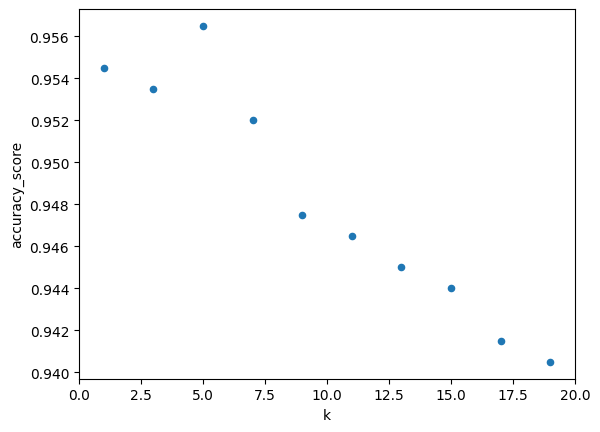

In [100]:
_ = results.plot.scatter(x='k', y='accuracy_score', xlim=[0,20])

In [101]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
knnPredOpt = knn.predict(valid_X)
print(confusion_matrix(valid_y, knnPredOpt))
print('Accuracy :', accuracy_score(valid_y, knnPredOpt))

[[1803    4]
 [  83  110]]
Accuracy : 0.9565


In [102]:
knn.predict(newCustomerNorm)

c:\Users\USER\anaconda3\envs\Pytorch\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [103]:
knn.predict_proba(newCustomerNorm)

c:\Users\USER\anaconda3\envs\Pytorch\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[1., 0.]])